In [1]:
import os
files = os.listdir('./')
logfiles = []
for file in files:
    if file.endswith('.log'):
        logfiles.append(file)

In [2]:
logfiles

['scenario1.log',
 'scenario2.log',
 'scenario3.log',
 'scenario4_Pa30.log',
 'scenario4_Pa30_1.log',
 'scenario4_Pa30_2.log',
 'scenario5_Pa1u10Ps1.log',
 'scenario5_Pa1u10Ps1_1.log',
 'scenario5_Pa1u10Ps1_2.log',
 'scenario5_Pa1u1ps1.log',
 'scenario5_Pa1u1ps1_1.log',
 'scenario5_Pa1u1ps1_2.log',
 'scenario5_Pa1u5Ps1.log',
 'scenario5_Pa1u5Ps1_1.log',
 'scenario5_Pa1u5Ps1_2.log']

In [31]:
os.listdir('./logsce4')

['scenario4_pa0.log',
 'scenario4_pa0_1.log',
 'scenario4_pa0_2.log',
 'scenario4_pa1.log',
 'scenario4_pa10.log',
 'scenario4_pa10_1.log',
 'scenario4_pa10_2.log',
 'scenario4_pa1_1.log',
 'scenario4_pa1_2.log',
 'scenario4_Pa30.log',
 'scenario4_Pa30_1.log',
 'scenario4_Pa30_2.log']

In [40]:
scenario4_pa0 = ['./logsce4/scenario4_pa0.log',
 './logsce4/scenario4_pa0_1.log',
 './logsce4/scenario4_pa0_2.log']
scenario4_pa1 = ['./logsce4/scenario4_pa1.log',
 './logsce4/scenario4_pa1_1.log',
 './logsce4/scenario4_pa1_2.log']
scenario4_pa10 = ['./logsce4/scenario4_pa10.log',
    './logsce4/scenario4_pa10_1.log',
    './logsce4/scenario4_pa10_2.log']
scenario4_pa30 = ['./logsce4/scenario4_pa30.log',
    './logsce4/scenario4_pa30_1.log',
    './logsce4/scenario4_pa30_2.log']
scenario4_stats = [scenario4_pa0, scenario4_pa1, scenario4_pa10, scenario4_pa30]

In [8]:
scenario23 = [
 'scenario2.log',
 'scenario3.log']

In [21]:
scenario5_pa1u10ps1 = ['scenario5_Pa1u10Ps1.log',
 'scenario5_Pa1u10Ps1_1.log',
 'scenario5_Pa1u10Ps1_2.log']
scenario5_pa1u1ps1 = [
 'scenario5_Pa1u1ps1.log',
 'scenario5_Pa1u1ps1_1.log',
 'scenario5_Pa1u1ps1_2.log']
scenario5_pa1u5ps1 = [
 'scenario5_Pa1u5Ps1.log',
 'scenario5_Pa1u5Ps1_1.log',
 'scenario5_Pa1u5Ps1_2.log']
scenario5_pa1u10ps10=['./logs/scenario5_Pa1u10Ps10.log',
 './logs/scenario5_Pa1u10Ps10_1.log',
 './logs/scenario5_Pa1u10Ps10_2.log']
scenario5_pa1u1ps10 = [
 './logs/scenario5_Pa1u1Ps10.log',
 './logs/scenario5_Pa1u1Ps10_1.log',
 './logs/scenario5_Pa1u1Ps10_2.log']
scenario5_pa1u5ps10 = [
 './logs/scenario5_Pa1u5Ps10.log',
 './logs/scenario5_Pa1u5Ps10_1.log',
 './logs/scenario5_Pa1u5Ps10_2.log']

In [22]:
scenario5_stats = [scenario5_pa1u1ps1, scenario5_pa1u5ps1, scenario5_pa1u10ps1,
                   scenario5_pa1u1ps10, scenario5_pa1u5ps10, scenario5_pa1u10ps10]

In [23]:
import numpy as np
def counts_bytype(files):
    records = [open(file).readlines() for file in files]
    records = [record[1:] for record in records]
    records = [[celltype.split('[')[1].split(']')[0].split(',') for celltype in record] for record in records]
    records = np.array(records, dtype=int)
    #avgcounts_BYtypes = np.average(records, axis=0)
    return records

In [24]:
scenario5_stats = np.array([counts_bytype(files) for files in scenario5_stats])

In [9]:
scenario23_stats = np.array(counts_bytype(scenario23))

In [41]:
scenario4_stats = np.array([counts_bytype(files) for files in scenario4_stats])
sce4_stddev=np.std(scenario4_stats, axis = 1)
sce4_avg = np.mean(scenario4_stats, axis = 1)

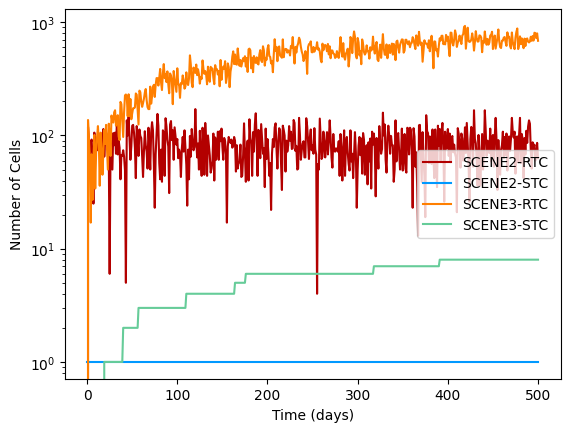

In [16]:
from matplotlib import pyplot as plt
window_size = 3
plt.plot(scenario23_stats[0][0], color='#B30000', label='SCENE2-RTC')
plt.plot(scenario23_stats[0][1], color='#0099FF', label='SCENE2-STC')
plt.plot(scenario23_stats[1][0], color='#FF7F00', label='SCENE3-RTC')
plt.plot(scenario23_stats[1][1], color='#66CC99', label='SCENE3-STC')
#plt.plot(avgcounts_BYtypes[2], color='red', label='TSTC')
plt.yscale('log')
plt.ylabel('Number of Cells')
plt.xlabel('Time (days)')
plt.legend()

In [25]:
sce5_stddev=np.std(scenario5_stats, axis = 1)
sce5_avg = np.mean(scenario5_stats, axis = 1)

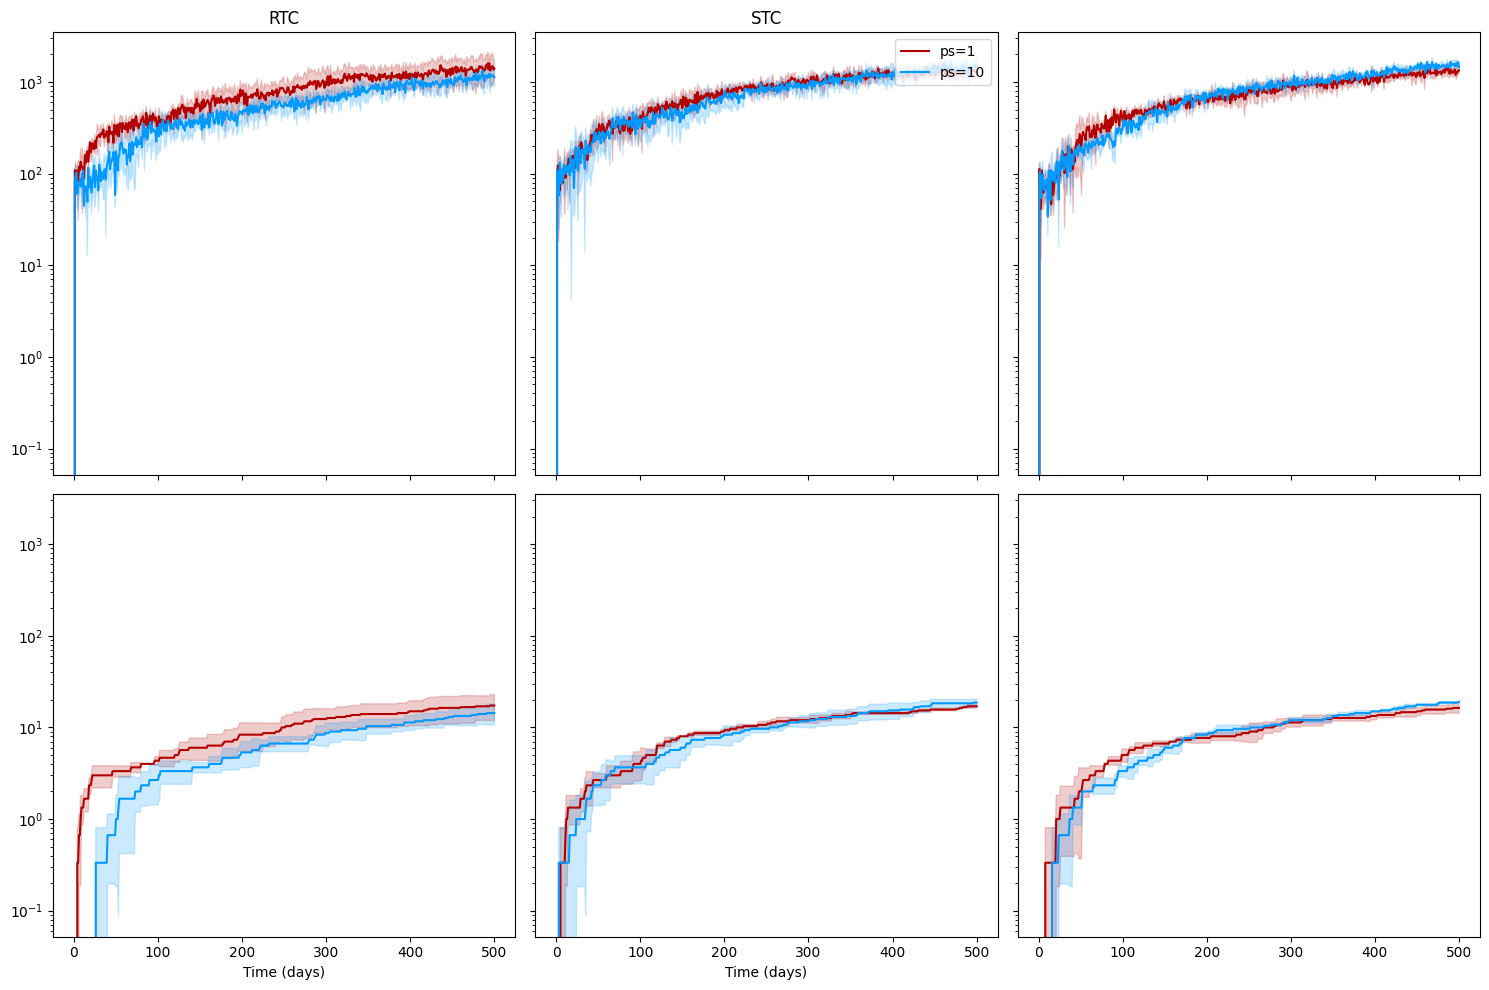

In [ ]:
import matplotlib.pyplot as plt
fig, axs  = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)
for i in range(3):
    ind1 = i
    ind2 = 3 + i
    
    data1 = sce5_avg[ind1]
    stddev1 = sce5_stddev[ind1]
    data2 = sce5_avg[ind2]
    stddev2 = sce5_stddev[ind2]
    
    i1 = 0
    j1 = i
    i2 = 1
    j2 = i 
    
    axs[i1, j1].plot(data1[0], color='#B30000', label='ps=1')
    axs[i1, j1].fill_between(range(len(data1[0])), data1[0] - stddev1[0], data1[0] + stddev1[0], color='#B30000', alpha=0.2)
    axs[i1, j1].plot(data2[0], color='#0099FF', label='ps=10')
    axs[i1, j1].fill_between(range(len(data2[0])), data2[0] - stddev2[0], data2[0] + stddev2[0], color='#0099FF', alpha=0.2)
    
    axs[i2, j2].plot(data1[1], color='#B30000', label='ps=1')
    axs[i2, j2].fill_between(range(len(data1[1])), data1[1] - stddev1[1], data1[1] + stddev1[1], color='#B30000', alpha=0.2)
    axs[i2, j2].plot(data2[1], color='#0099FF', label='ps=10')
    axs[i2, j2].fill_between(range(len(data2[1])), data2[1] - stddev2[1], data2[1] + stddev2[1], color='#0099FF', alpha=0.2)
    #axs[row, col].set_xlabel('Time (days)')
    #axs[row, col].set_ylabel('Number of Cells') 
    #axs[row, col].legend() 
    axs[i1, j1].set_yscale('log')
    axs[i2, j2].set_yscale('log') 


axs[0, 0].set_title('RTC')
axs[0, 1].set_title('STC')
#axs[0, 2].set_title('u=10')
#axs[0, 0].set_ylabel('Ps = 1 \n Number of Cells')
#axs[1, 0].set_ylabel('Ps = 10 \n Number of Cells')
axs[1, 0].set_xlabel('Time (days)')
axs[1, 1].set_xlabel('Time (days)')
#axs[1, 2].set_xlabel('Time (days)')

axs[0, 1].legend(loc='upper right')




plt.tight_layout() 
plt.show()

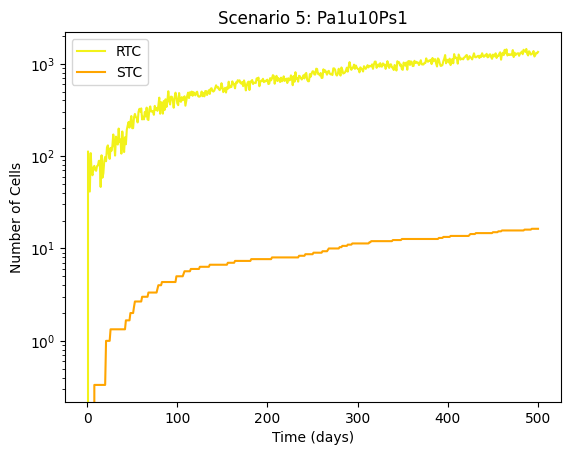

In [9]:
import matplotlib.pyplot as plt
plt.plot(avg_sce5_pa1u10ps1[0], color=(0.95, 0.95, 0.1), label='RTC')
plt.plot(avg_sce5_pa1u10ps1[1], color='orange', label='STC')
#plt.plot(avgcounts_BYtypes[2], color='red', label='TSTC')
plt.yscale('log')
plt.ylabel('Number of Cells')
plt.xlabel('Time (days)')
plt.title('Scenario 5: Pa1u10Ps1')
plt.legend()

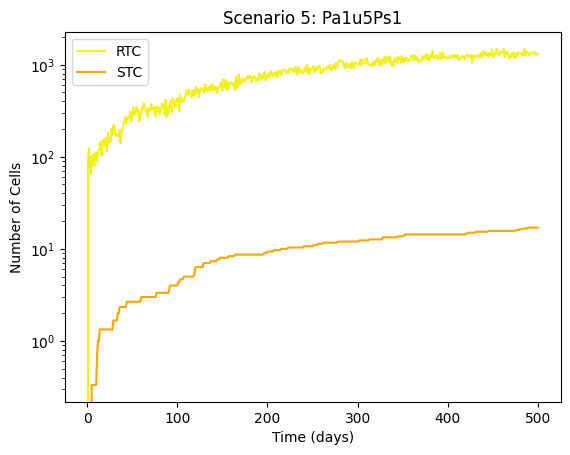

In [11]:
avg_sce5_pa1u5ps1 = avg_counts_bytype(scenario5_pa1u5ps1)
import matplotlib.pyplot as plt
plt.plot(avg_sce5_pa1u5ps1[0], color=(0.95, 0.95, 0.1), label='RTC')
plt.plot(avg_sce5_pa1u5ps1[1], color='orange', label='STC')
#plt.plot(avgcounts_BYtypes[2], color='red', label='TSTC')
plt.yscale('log')
plt.ylabel('Number of Cells')
plt.xlabel('Time (days)')
plt.title('Scenario 5: Pa1u5Ps1')
plt.legend()

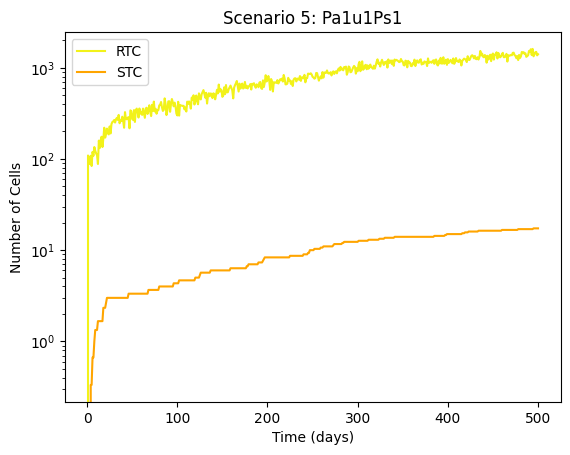

In [12]:
avg_sce5_pa1u1ps1 = avg_counts_bytype(scenario5_pa1u1ps1)
import matplotlib.pyplot as plt
plt.plot(avg_sce5_pa1u1ps1[0], color=(0.95, 0.95, 0.1), label='RTC')
plt.plot(avg_sce5_pa1u1ps1[1], color='orange', label='STC')
#plt.plot(avgcounts_BYtypes[2], color='red', label='TSTC')
plt.yscale('log')
plt.ylabel('Number of Cells')
plt.xlabel('Time (days)')
plt.title('Scenario 5: Pa1u1Ps1')
plt.legend()

In [46]:
std_dev = np.std(scenario5_stats, axis=0)

In [48]:
np.average(scenario5_stats, axis=0)

array([[[0.00000000e+00, 1.12166667e+02, 8.66666667e+01, ...,
         1.24450000e+03, 1.24400000e+03, 1.19833333e+03],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.51666667e+01, 1.53333333e+01, 1.53333333e+01],
        [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],

       [[0.00000000e+00, 9.65000000e+01, 1.11666667e+02, ...,
         1.49916667e+03, 1.50633333e+03, 1.53733333e+03],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.80000000e+01, 1.80000000e+01, 1.80000000e+01],
        [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],

       [[0.00000000e+00, 9.26666667e+01, 8.60000000e+01, ...,
         1.44500000e+03, 1.38633333e+03, 1.31416667e+03],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.80000000e+01, 1.80000000e+01, 1.80000000e+01],
        [1.00000000e+00, 1.00000000e

In [66]:
sce4 = counts_bytype(scenario4)

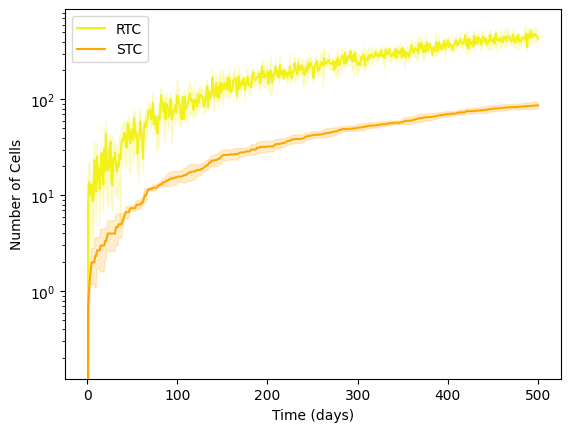

In [68]:
sce4_avg = np.average(sce4, axis=0)
sce4_stddev = np.std(sce4, axis=0)
import matplotlib.pyplot as plt
plt.plot(sce4_avg[0], color=(0.95, 0.95, 0.1), label='RTC')
plt.plot(sce4_avg[1], color='orange', label='STC')

plt.fill_between([i for i in range(len(sce4_avg[0]))], sce4_avg[0]-sce4_stddev[0], sce4_avg[0]+sce4_stddev[0], alpha=0.2, color=(0.95, 0.95, 0.1))
plt.fill_between([i for i in range(len(sce4_avg[1]))], sce4_avg[1]-sce4_stddev[1], sce4_avg[1]+sce4_stddev[1], alpha=0.2, color='orange')
#plt.plot(avgcounts_BYtypes[2], color='red', label='TSTC')
plt.yscale('log')
plt.ylabel('Number of Cells')
plt.xlabel('Time (days)')
plt.legend()

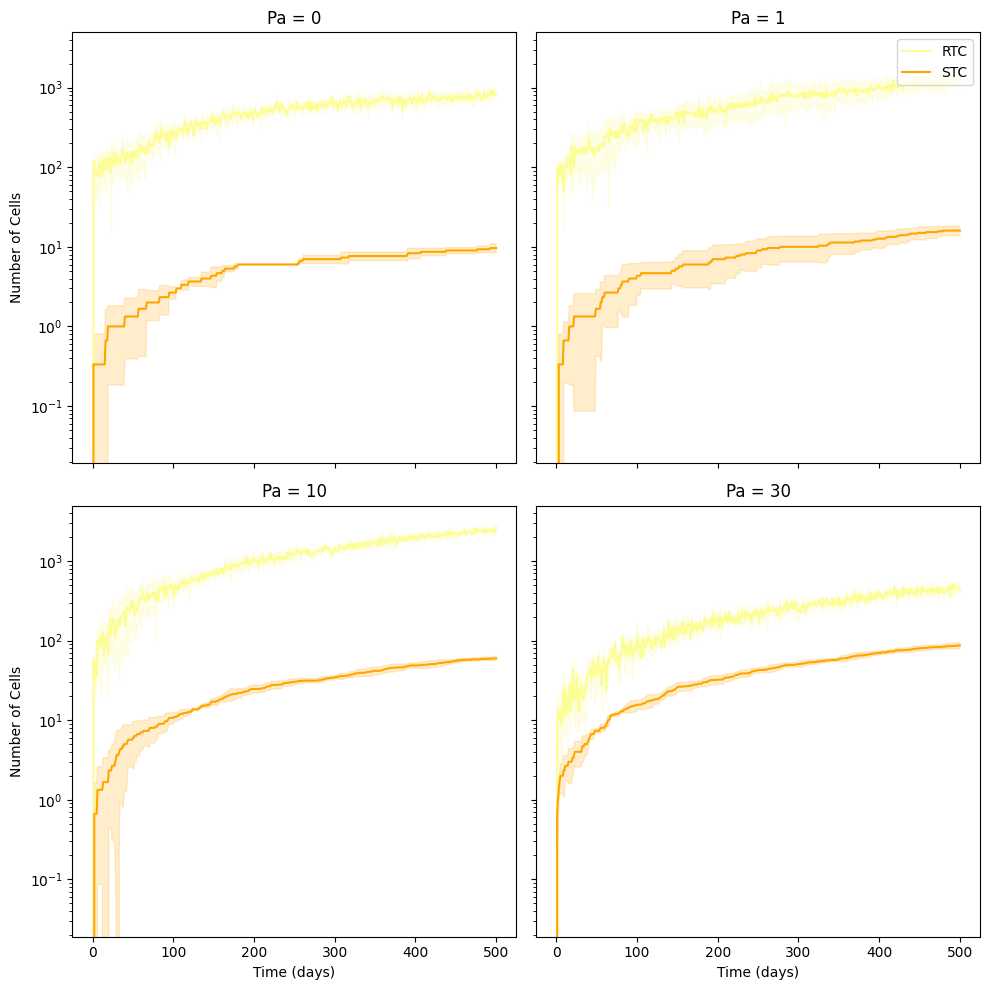

In [49]:
import matplotlib.pyplot as plt
fig, axs  = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
for i in range(4):
    row = i // 2
    col = i % 2
    
    data = sce4_avg[i]
    stddev = sce4_stddev[i]
    
    axs[row, col].plot(data[0], color='#FDFD96', label='RTC')
    axs[row, col].fill_between(range(len(data[0])), data[0] - stddev[0], data[0] + stddev[0], color='#FDFD96', alpha=0.2)
    axs[row, col].plot(data[1], color='orange', label='STC')
    axs[row, col].fill_between(range(len(data[1])), data[1] - stddev[1], data[1] + stddev[1], color='orange', alpha=0.2)
    

    #axs[row, col].set_xlabel('Time (days)')
    #axs[row, col].set_ylabel('Number of Cells') 
    #axs[row, col].legend() 
    axs[row, col].set_yscale('log')


axs[0, 0].set_title('Pa = 0')
axs[0, 1].set_title('Pa = 1')
axs[1, 0].set_title('Pa = 10')
axs[1, 1].set_title('Pa = 30')
#axs[0, 1].set_title('STC')
#axs[0, 2].set_title('u=10')
axs[0, 0].set_ylabel('Number of Cells')
axs[1, 0].set_ylabel('Number of Cells')
axs[1, 0].set_xlabel('Time (days)')
axs[1, 1].set_xlabel('Time (days)')
#axs[1, 2].set_xlabel('Time (days)')

axs[0, 1].legend(loc='upper right')




plt.tight_layout() 
plt.show()